Initial weight: 0.0, Bias: 0.0, Loss: 17173.0 
Final weight: 18.4, Bias: -2.99999, Loss: 163.2 
The calculated test output for test input  2 is =  33.8


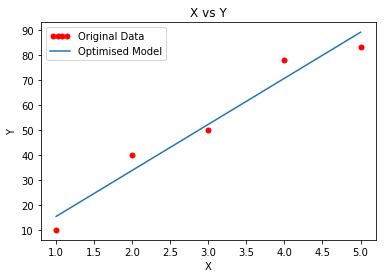

In [5]:
'''This is a modified version of Google's TensorFlow(TF) Tutorial. Here you will learn about the TF variable, placeholder and linear optimization model.
By Dr. Mohendra Roy
'''
import numpy as np
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
sess = tf.Session()


import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import pylab as plb
from IPython.display import Image, display



# initial variable for weights and biases
w = tf.Variable(0.0)
b = tf.Variable(0.0)
init = tf.global_variables_initializer()  # handler to initiate the global variable
sess.run(init)
wini = sess.run(w)
bini = sess.run(b)

# initial placeholder for input data and labels
x = tf.placeholder(tf.float32)  # for input data
y = tf.placeholder(tf.float32)  # for label

# linear model
lm = x*w + b

# Setting the desired goal
loss = tf.reduce_sum(tf.square(lm - y))
lossini = sess.run(loss, {x: [1, 2, 3, 4, 5], y: [10, 40, 50, 78, 83]})

''' Our desired goal is to reduce the difference between the training input and training label '''

''' To achieve this we will use a optimization method using the Gradient Descent Optimizer algorithm '''

# Optimization with Gradient Descent Optimizer

op = tf.train.GradientDescentOptimizer(0.01)  # The number here is the step at which the optimization will descent
ob = op.minimize(loss)  # The objective(ob) is to minimize the loss

''' Our main objective is to reduce the loss, i.e. the difference between the training input and label '''

''' Now we will  train our model in a loop to get the minimum loss by updating weight and biases '''

# Training loop
for i in range(1000):
    sess.run(ob, {x: [1, 2, 3, 4, 5], y: [10, 40, 50, 78, 83]})


wfi = sess.run(w)  # final weight after training
bfi = sess.run(b)  # final bias after training
lossfi = sess.run(loss, {x: [1, 2, 3, 4, 5], y: [10, 40, 50, 78, 83]})  # loss after the training

print("Initial weight: %s, Bias: %s, Loss: %s " % (wini, bini, lossini))  # The weight, bias and loss before training

print("Final weight: %s, Bias: %s, Loss: %s " % (wfi, bfi, lossfi))  # The weight, bias and loss after training

''' Till this we just train our 1st linear model. However we want to test the model too  '''


# Testing of the model
xin = 2
y = sess.run(lm, {x: xin})
print("The calculated test output for test input  %x is = " % xin, y)
X = np.array([1, 2, 3, 4, 5]) 
Y = np.array([10, 40, 50, 78, 83])
Hf = wfi*X + bfi 
line1, = plt.plot(X,Y, "ro", markersize=5, label='Original Data')
line2, = plt.plot(X,Hf, label='Optimised Model')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()